<a href="https://colab.research.google.com/github/dimLMT/ML-assignment/blob/main/Anomaly_Detection_(Core).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Sklearn Display
from sklearn import set_config
set_config(transform_output='pandas')
# Preprocessing

In [48]:
fpath='/content/drive/MyDrive/CodingDojo/05-IntermediateML/Week18/Data/credit_card.csv'
df=pd.read_csv(fpath)
pd.set_option('display.max_columns',None)
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      10000 non-null  float64
 1   V2      10000 non-null  float64
 2   V3      10000 non-null  float64
 3   V4      10000 non-null  float64
 4   V5      10000 non-null  float64
 5   V6      10000 non-null  float64
 6   V7      10000 non-null  float64
 7   V8      10000 non-null  float64
 8   V9      10000 non-null  float64
 9   V10     10000 non-null  float64
 10  V11     10000 non-null  float64
 11  V12     10000 non-null  float64
 12  V13     10000 non-null  float64
 13  V14     10000 non-null  float64
 14  V15     10000 non-null  float64
 15  V16     10000 non-null  float64
 16  V17     10000 non-null  float64
 17  V18     10000 non-null  float64
 18  V19     10000 non-null  float64
 19  V20     10000 non-null  float64
 20  V21     10000 non-null  float64
 21  V22     10000 non-null  float64
 22 

In [13]:
df.isna().sum().sum()

0

## KMeans:


In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
# Instantiate Standard Scaler
scaler = StandardScaler()
# Fit & transform data.
scaled_df = scaler.fit_transform(df)

In [15]:
scaled_df.duplicated().sum()

0

In [16]:
# Instantiate KMeans
kmeans = KMeans(n_clusters = 3, n_init = 'auto', random_state = 42)
X = scaled_df.copy()
kmeans.fit(X)

KMeans(n_clusters=3, n_init='auto', random_state=42)

In [17]:
# Making a dataframe for saving clusters
scaled_df['3_clusters'] = kmeans.predict(X)
scaled_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,3_clusters
0,-0.726092,-0.270865,1.389980,0.762227,-0.236899,0.264052,0.285346,0.131083,-0.384443,0.286120,-1.133169,0.446834,-1.535047,-0.821518,1.645946,-0.517249,-0.133250,0.057508,0.585590,0.370795,0.043066,0.689788,-0.163478,0.083851,0.099198,-0.532722,0.312929,-0.090009,0.459472,2
1,0.949810,-0.013020,-0.647336,0.110710,0.102482,-0.155239,-0.009963,0.120253,-0.915428,0.051569,0.722785,1.551943,-0.315973,-0.686699,0.798096,0.541269,-0.466837,-0.205886,-0.093585,-0.167706,-0.185510,-0.760673,0.268858,-0.603364,0.188884,0.033761,-0.039088,0.043500,-0.333835,2
2,-0.725138,-1.235035,0.733929,0.062810,-0.377373,1.293991,0.797185,0.249752,-1.995239,0.392444,-0.124638,0.895884,-0.128068,-0.704557,2.539689,-3.258583,0.798958,-0.127804,-2.707713,0.830447,0.336466,1.471338,1.918734,-1.193707,-0.959876,-0.442774,-0.153601,-0.234422,1.696110,2
3,-0.467623,-0.356408,0.750937,-0.808030,0.042565,0.868121,0.283501,0.353112,-1.885794,0.153501,-0.854378,0.969520,-0.300606,-0.802796,-0.492057,-1.184825,-1.055192,2.500622,-1.436230,-0.401179,-0.056083,0.258431,-0.326493,-2.015264,1.303733,-0.591732,0.137995,0.217896,0.318445,2
4,-0.593701,0.452248,0.540940,0.079101,-0.295578,-0.018016,0.613062,-0.163028,0.004829,0.888749,-1.365765,1.205880,0.389505,-1.472671,0.329236,-0.495778,-0.593159,-0.023071,1.079111,0.634808,0.052846,1.513434,-0.218569,0.209441,-0.677493,0.710640,0.524976,0.791442,0.029532,2


In [18]:
from scipy.spatial.distance import cdist
# Calculate distance to each cluster center
distances = cdist(X, kmeans.cluster_centers_, 'euclidean')

In [20]:
# Saving distances as a dataframe for convenience
cluter_cols = [f"Distance (Cluster {c})" for c in range(len(kmeans.cluster_centers_))]
distance_df = pd.DataFrame(distances, columns = cluter_cols)
distance_df.head()

,Distance (Cluster 0),Distance (Cluster 1),Distance (Cluster 2)
0,4.127849,4.695017,2.825513
1,4.287068,3.583366,2.400110
2,7.190748,7.558619,6.579811
3,5.964779,5.715718,4.714446
4,4.132515,4.825469,3.289179


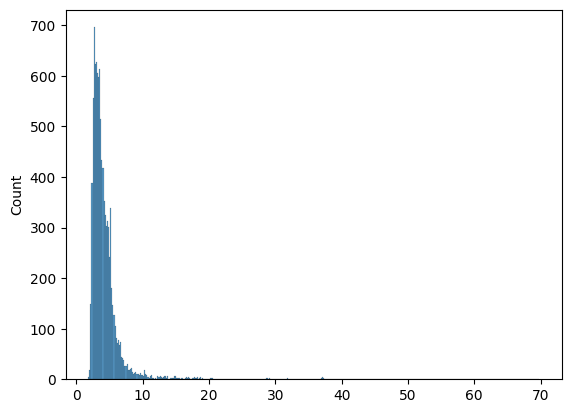

In [21]:
# Get the minimum distance to any cluster for each point
min_distances = np.min(distances, axis=1)
# distance from closet centroid
ax = sns.histplot(min_distances)

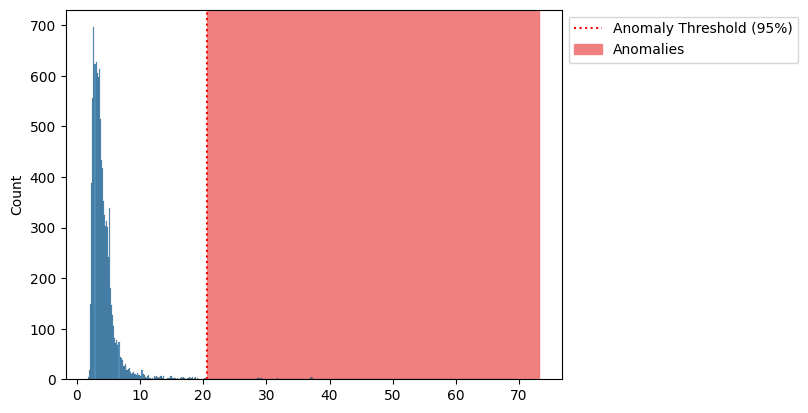

In [22]:
# Set a threshold based on a percentile
threshold = np.percentile(min_distances, 99.6)
# Visualize the distribution of distances and the anomaly threshold.
ax = sns.histplot(min_distances)
ax.axvline(threshold, color='red', ls=':', label='Anomaly Threshold (95%)')
ax.axvspan(threshold, ax.get_xlim()[1], color='lightcoral',zorder=0, label='Anomalies')
ax.legend(bbox_to_anchor=[1,1]);

In [25]:
# Identify anomalies where the distance to closest cluster center is above the threshold
filter_anomalies = min_distances > threshold
# Getting the row indices of the anomalies
idx_anomalies = X[filter_anomalies].index
# Slicing the anomalies (for demonstration)
print(f'we have identified {filter_anomalies.sum()} anomalies.')
scaled_df.iloc[idx_anomalies]

we have identified 40 anomalies.


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,3_clusters
159,-3.834960,-9.431468,-5.686284,2.104654,-1.153193,3.584223,4.522820,-0.129306,-1.147362,-1.366035,-0.971285,1.040386,-0.317010,0.443842,0.823397,0.531465,-0.862498,1.022771,-1.122225,12.960326,2.518824,-3.332963,-7.192555,2.023902,-1.141962,-1.367622,-1.773317,2.499616,20.320071,2
1376,-2.418627,-3.007869,-2.040269,1.407855,-8.255103,4.877629,10.065097,-1.668099,-0.900585,-0.710429,-0.933227,-0.448552,-1.440443,-1.453373,1.303724,1.877587,-1.230779,-0.183323,-0.915106,-3.754280,-1.015485,1.764920,5.047600,0.394163,0.499370,1.889565,3.994384,-6.126389,12.890690,2
1619,-7.150070,-7.528445,-11.441444,4.009433,-27.290908,16.374319,31.878466,-5.938228,-2.347745,-2.195640,2.514530,-0.357690,1.279856,-1.902074,3.852449,4.646881,-2.058505,-1.093783,1.015847,-19.791952,-5.125945,2.412080,-5.911458,1.395896,1.533320,1.248504,9.496001,15.504724,41.292747,2
2156,-3.674689,-9.158175,-3.656015,2.370064,-3.748184,0.415459,4.262012,-0.732546,-0.492485,-1.483717,-1.212926,0.933604,-0.708696,0.116644,1.129175,0.712448,-0.406408,0.674243,-1.411297,12.238043,2.443958,-2.902722,-6.553469,1.000686,-2.487275,-0.031340,-1.778584,2.425582,19.461379,2
2212,-3.215208,3.026652,-1.687193,-2.215652,-0.775564,1.476574,-4.085387,-11.810305,0.773002,0.285954,0.584726,2.037797,-2.106236,0.482640,0.478011,-0.855557,0.894265,0.266580,0.336464,-5.487786,16.278911,-6.764131,4.300451,-0.071619,-0.100710,-0.275131,1.512629,1.061451,-0.326762,0
2439,-7.824911,-12.184466,-1.114101,2.453688,9.132442,-5.838093,-6.342982,1.306016,-0.646520,-0.180378,0.226978,2.269757,-0.401795,0.707069,-0.007378,-0.430741,0.179731,-0.494607,-1.269910,7.457408,1.892358,-1.190891,0.083439,-0.193509,-0.965160,0.213631,0.481461,-8.850109,0.299547,2
2594,-1.524177,-2.246208,-3.438370,1.228373,-9.675750,5.977763,11.396173,-1.403798,-1.962029,-1.585241,0.016495,0.746917,0.873895,-0.755322,1.880003,1.633457,-1.608488,1.988047,2.116557,1.340186,-0.064103,0.668031,4.593911,-1.331986,0.138431,-0.625159,2.898280,-2.338725,15.363209,2
2654,-4.789278,2.105598,-1.241513,0.500971,0.085842,2.026108,-5.749739,-15.222733,0.203976,0.678419,-0.916013,1.914899,-1.816517,-0.010251,-0.301824,-0.501598,1.207208,-1.025966,-0.662560,-6.412602,10.683389,-4.582514,5.469079,0.696040,0.498896,-0.683721,3.195176,-2.405010,-0.186922,0
2756,-6.913533,-7.777855,0.673923,1.964941,6.806898,-3.195860,-8.233600,-4.009462,1.273875,-0.009641,-1.048503,2.254194,-0.511892,-1.097861,-0.253083,0.208405,0.393092,-2.235378,-0.330877,-8.166138,-4.784251,2.834458,-1.390803,1.062015,-1.474357,1.074814,8.311982,-4.891511,0.110575,2
2911,-2.686228,3.031804,-2.148883,-0.012320,-1.157837,1.912165,-10.291944,-18.772044,-2.282244,-4.544346,-0.981103,3.220752,-1.636125,2.643913,0.917435,-0.571699,1.943065,-0.101030,0.962689,9.779945,-12.357685,6.045469,-0.347143,1.526074,1.239905,-0.878097,-0.345087,2.003279,-0.342960,0


In [35]:
scaled_df['kmeans_anomalies'] = filter_anomalies

## Isolation Forest:

In [29]:
from sklearn.ensemble import IsolationForest
# Instantiate the model with a contaimination of 0.004 (we will identify 0.4% as anamolous)
iso_anomalies = IsolationForest(contamination=0.004, random_state = 42)
# fit the model using .values to avoid a warning
iso_anomalies.fit(X.values)

IsolationForest(contamination=0.004, random_state=42)

In [57]:
# Obtain results from the model
predictions = iso_anomalies.predict(X.values)
# Change the labels to match our columns from the kmeans dataframe
# filter Anomalies
predictions = predictions ==-1
# Preview new labels
print(f'we have identified {predictions.sum()} anomalies.')
predictions[:20]

we have identified 40 anomalies.


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False])

In [58]:
# Add isolation forest predictions to the dataframe
scaled_df['iso_anomalies'] = predictions
# Preview dataframe with new column
scaled_df.tail()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,3_clusters,kmeans_anomalies,iso_anomalies,both
9995,-0.582254,0.822928,0.675781,-0.436159,0.339986,-0.211684,0.974073,-0.390541,0.960755,1.355617,1.714193,-0.800944,-0.299965,0.315234,-0.009570,-0.379079,-0.195713,0.065875,-0.459587,0.814716,-0.270513,0.367525,-0.088748,0.237025,-1.341345,0.139345,-0.321884,-1.174255,-0.294421,0,False,False,0
9996,-0.698262,0.165437,1.081422,-0.358389,0.680357,-1.081387,0.501505,-0.183794,0.417743,-0.314791,-0.348954,-1.341422,-0.520684,0.692011,0.122967,0.471736,-0.272092,-0.022164,-0.900585,-0.233550,-0.472572,-1.408476,-0.474189,0.435388,0.174699,-0.266039,-0.080968,-0.507701,-0.309647,1,False,False,0
9997,-1.414777,-0.618350,1.992252,-1.944731,-0.344833,-0.355713,-0.631952,0.059212,3.483615,-0.631703,0.598080,-0.076506,-0.518558,-0.828417,-2.934914,-0.669045,0.002853,0.827879,-0.323503,-0.307809,-0.341595,1.258769,-1.745143,0.963114,1.413275,-0.319949,0.927441,-0.675591,-0.191782,1,False,False,0
9998,0.243406,-0.143847,-0.412310,0.410330,1.823885,3.221485,-0.476516,0.691276,0.544611,0.187903,-0.272365,-0.951474,0.750738,0.362203,0.762428,-0.245995,-0.094754,1.666555,1.761209,0.599442,0.191866,1.413804,0.400581,1.603386,-2.899046,-0.703646,0.333142,0.155375,-0.019007,0,False,False,0
9999,0.983163,-0.739865,0.058241,-0.449300,-0.925103,-0.067181,-0.895100,0.163666,-0.009869,0.407191,1.373020,-0.666082,0.030129,0.429258,-1.341489,0.724653,1.181436,-1.806884,0.821094,-0.097439,-0.173153,-0.357450,0.361856,0.230856,0.110034,-1.031957,0.000499,0.010078,-0.202634,1,False,False,0


In [56]:
# Make a list of anomolies identified in both methods
scaled_df['both'] = filter_anomalies*predictions
scaled_df['both'].sum()

27

a. How many anomalies did the two approaches agree on? >> 27

b. What percentage of the anomalies did the two approaches agree on? >>27/40